In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('Bengaluru_House_Data.csv')
data.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [3]:
data.shape

(13320, 9)

In [4]:
data['area_type'].value_counts()

Super built-up  Area    8790
Built-up  Area          2418
Plot  Area              2025
Carpet  Area              87
Name: area_type, dtype: int64

In [5]:
data_2 = data.drop(['area_type','availability','society'],axis = 1)
data_2.head()

,location,size,total_sqft,bath,balcony,price
0,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,3.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00
4,Kothanur,2 BHK,1200,2.0,1.0,51.00


In [6]:
data_2.isnull().sum()

location        1
size           16
total_sqft      0
bath           73
balcony       609
price           0
dtype: int64

In [7]:
data_3 = data_2.dropna()
data_3.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
balcony       0
price         0
dtype: int64

In [8]:
data_3.shape

(12710, 6)

In [9]:
data_3['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '3 Bedroom', '1 BHK', '1 RK',
       '4 BHK', '1 Bedroom', '2 Bedroom', '6 Bedroom', '8 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '11 Bedroom', '43 Bedroom',
       '14 BHK', '8 BHK', '12 Bedroom', '10 Bedroom', '13 BHK'],
      dtype=object)

In [10]:
data_3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12710 entries, 0 to 13319
Data columns (total 6 columns):
location      12710 non-null object
size          12710 non-null object
total_sqft    12710 non-null object
bath          12710 non-null float64
balcony       12710 non-null float64
price         12710 non-null float64
dtypes: float64(3), object(3)
memory usage: 695.1+ KB


In [11]:
data_3['bhk'] = data_3['size'].apply(lambda x: int(x.split(' ')[0]))

C:\Users\Gitanshu\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [12]:
data_3.head()

,location,size,total_sqft,bath,balcony,price,bhk
0,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,3.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,1.0,51.00,2


In [13]:
data_3['bhk'].unique()

array([ 2,  4,  3,  1,  6,  8,  7,  5, 11,  9, 27, 43, 14, 12, 10, 13],
      dtype=int64)

In [14]:
data_3[data_3.bhk>20]

,location,size,total_sqft,bath,balcony,price,bhk
1718,2Electronic City Phase II,27 BHK,8000,27.0,0.0,230.0,27
4684,Munnekollal,43 Bedroom,2400,40.0,0.0,660.0,43


In [15]:
data_3['total_sqft'].unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [16]:
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True

In [17]:
data_3[~data_3['total_sqft'].apply(is_float)].head(20)

,location,size,total_sqft,bath,balcony,price,bhk
30,Yelahanka,4 BHK,2100 - 2850,4.0,0.0,186.000,4
122,Hebbal,4 BHK,3067 - 8156,4.0,0.0,477.000,4
137,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,0.0,54.005,2
165,Sarjapur,2 BHK,1145 - 1340,2.0,0.0,43.490,2
188,KR Puram,2 BHK,1015 - 1540,2.0,0.0,56.800,2
410,Kengeri,1 BHK,34.46Sq. Meter,1.0,0.0,18.500,1
549,Hennur Road,2 BHK,1195 - 1440,2.0,0.0,63.770,2
661,Yelahanka,2 BHK,1120 - 1145,2.0,0.0,48.130,2
672,Bettahalsoor,4 Bedroom,3090 - 5002,4.0,0.0,445.000,4
772,Banashankari Stage VI,2 BHK,1160 - 1195,2.0,0.0,59.935,2


In [18]:
def convert_sqft_to_num(x):
    tokens = x.split('-')
    if len(tokens) == 2:
        return (float(tokens[0]) + float(tokens[1]))/2
    try:
        return float(x)
    except:
        return None

In [19]:
data_4 = data_3.copy()
data_4['total_sqft'] = data_4['total_sqft'].apply(convert_sqft_to_num)

In [20]:
data_4.head(30)

,location,size,total_sqft,bath,balcony,price,bhk
0,Electronic City Phase II,2 BHK,1056.0,2.0,1.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,3.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,3.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,1.0,95.00,3
4,Kothanur,2 BHK,1200.0,2.0,1.0,51.00,2
5,Whitefield,2 BHK,1170.0,2.0,1.0,38.00,2
8,Marathahalli,3 BHK,1310.0,3.0,1.0,63.25,3
10,Whitefield,3 BHK,1800.0,2.0,2.0,70.00,3
11,Whitefield,4 Bedroom,2785.0,5.0,3.0,295.00,4
12,7th Phase JP Nagar,2 BHK,1000.0,2.0,1.0,38.00,2


In [21]:
data_5 = data_4.copy()
data_5['price_per_sqft'] = data_5['price']*100000/data_5['total_sqft']
data_5.head()

,location,size,total_sqft,bath,balcony,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,1.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,3.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,3.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,1.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,1.0,51.00,2,4250.000000


In [22]:
len(data_5.location.unique())

1265

In [23]:
data_5.location = data_5.location.apply(lambda x: x.strip())
location_stats = data_5['location'].value_counts()
location_stats

Whitefield                         515
Sarjapur  Road                     372
Electronic City                    302
Kanakpura Road                     261
Thanisandra                        234
                                  ... 
banashankari stage iii sa            1
manyata                              1
Kengeri Satellite Town Stage II      1
Banaswadi,                           1
Punappa Layout                       1
Name: location, Length: 1254, dtype: int64

In [24]:
len(location_stats[location_stats <= 10])

1017

In [25]:
location_stats_less_than_10 = location_stats[location_stats <= 10]
location_stats_less_than_10

Basapura                           10
Kodigehalli                        10
Kalkere                            10
HAL 2nd Stage                      10
Gunjur Palya                       10
                                   ..
banashankari stage iii sa           1
manyata                             1
Kengeri Satellite Town Stage II     1
Banaswadi,                          1
Punappa Layout                      1
Name: location, Length: 1017, dtype: int64

In [26]:
len(data_5.location.unique())

1254

In [27]:
data_5.location = data_5.location.apply(lambda x: 'other' if x in location_stats_less_than_10 else x)
len(data_5.location.unique())

238

In [28]:
data_5.head(30)

,location,size,total_sqft,bath,balcony,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,1.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,3.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,3.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,1.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,1.0,51.00,2,4250.000000
5,Whitefield,2 BHK,1170.0,2.0,1.0,38.00,2,3247.863248
8,Marathahalli,3 BHK,1310.0,3.0,1.0,63.25,3,4828.244275
10,Whitefield,3 BHK,1800.0,2.0,2.0,70.00,3,3888.888889
11,Whitefield,4 Bedroom,2785.0,5.0,3.0,295.00,4,10592.459605
12,7th Phase JP Nagar,2 BHK,1000.0,2.0,1.0,38.00,2,3800.000000


In [29]:
data_5[data_5.total_sqft/data_5.bhk < 300].head(10)

,location,size,total_sqft,bath,balcony,price,bhk,price_per_sqft
58,Murugeshpalya,6 Bedroom,1407.0,4.0,1.0,150.0,6,10660.980810
68,Devarachikkanahalli,8 Bedroom,1350.0,7.0,0.0,85.0,8,6296.296296
70,other,3 Bedroom,500.0,3.0,2.0,100.0,3,20000.000000
78,Kaval Byrasandra,2 BHK,460.0,1.0,0.0,22.0,2,4782.608696
89,Rajaji Nagar,6 Bedroom,710.0,6.0,3.0,160.0,6,22535.211268
119,Hennur Road,2 Bedroom,276.0,3.0,3.0,23.0,2,8333.333333
129,Vishwapriya Layout,7 Bedroom,950.0,7.0,0.0,115.0,7,12105.263158
170,other,6 BHK,1300.0,6.0,0.0,99.0,6,7615.384615
176,Kumaraswami Layout,5 Bedroom,600.0,3.0,2.0,85.0,5,14166.666667
193,other,7 Bedroom,1800.0,7.0,1.0,250.0,7,13888.888889


In [30]:
data_5.shape

(12710, 8)

In [31]:
data_6 = data_5[~(data_5.total_sqft/data_5.bhk < 300)]

In [32]:
data_6.shape

(12055, 8)

In [33]:
data_6.price_per_sqft.describe()

count     12013.000000
mean       6206.082347
std        3985.518807
min         267.829813
25%        4199.363057
50%        5252.525253
75%        6823.529412
max      176470.588235
Name: price_per_sqft, dtype: float64

## Outliers Detection we use Standard Deviation 

In [34]:
def remove_pps_outliers(df):
    df_out = pd.DataFrame()
    for key ,subdf in df.groupby('location'):
        m = np.mean(subdf.price_per_sqft)
        st = np.std(subdf.price_per_sqft)
        reduced_df = subdf[(subdf.price_per_sqft > (m-st)) & (subdf.price_per_sqft <= (m+st))]
        df_out = pd.concat([df_out,reduced_df],ignore_index = True)
    return df_out

data_7 = remove_pps_outliers(data_6)
data_7.shape

(9848, 8)

In [35]:
data_7 = data_7.drop(['balcony'],axis = 1)
data_7.shape

(9848, 7)

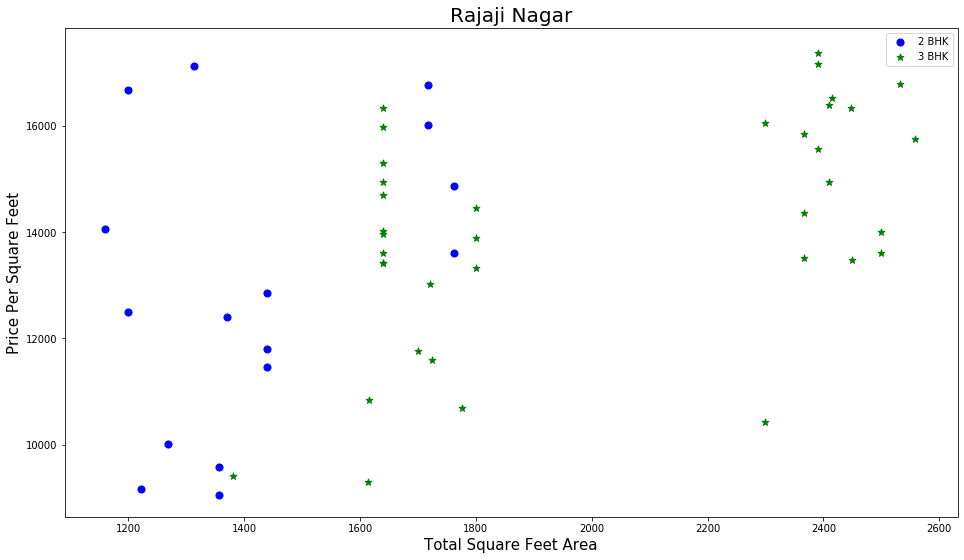

In [40]:
def plot_scatter_plot(df,location):
    bhk2 = df[(df.location == location) & (df.bhk == 2)]
    bhk3 = df[(df.location == location) & (df.bhk == 3)]
    plt.figure(figsize = (16,9))
    plt.scatter(bhk2.total_sqft,bhk2.price_per_sqft,color = 'blue',label = '2 BHK', s = 50)
    plt.scatter(bhk3.total_sqft,bhk3.price_per_sqft,color = 'green',label = '3 BHK', s = 50,marker='*')
    plt.xlabel("Total Square Feet Area",fontsize = 15)
    plt.ylabel("Price Per Square Feet",fontsize = 15)
    plt.title(location, fontsize = 20)
    plt.legend()

plot_scatter_plot(data_7,"Rajaji Nagar")

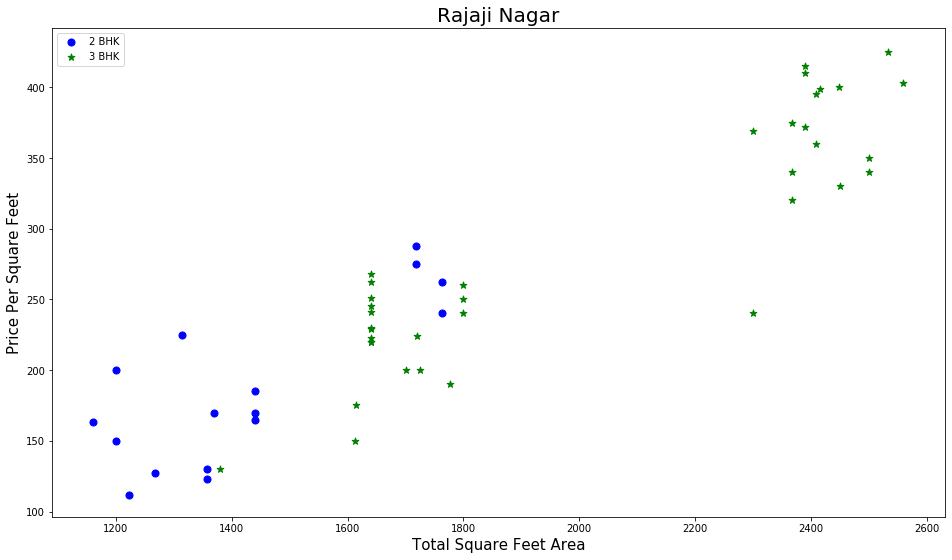

In [41]:
def plot_scatter_plot(df,location):
    bhk2 = df[(df.location == location) & (df.bhk == 2)]
    bhk3 = df[(df.location == location) & (df.bhk == 3)]
    plt.figure(figsize = (16,9))
    plt.scatter(bhk2.total_sqft,bhk2.price,color = 'blue',label = '2 BHK', s = 50)
    plt.scatter(bhk3.total_sqft,bhk3.price,color = 'green',label = '3 BHK', s = 50,marker='*')
    plt.xlabel("Total Square Feet Area",fontsize = 15)
    plt.ylabel("Price Per Square Feet",fontsize = 15)
    plt.title(location, fontsize = 20)
    plt.legend()

plot_scatter_plot(data_7,"Rajaji Nagar")

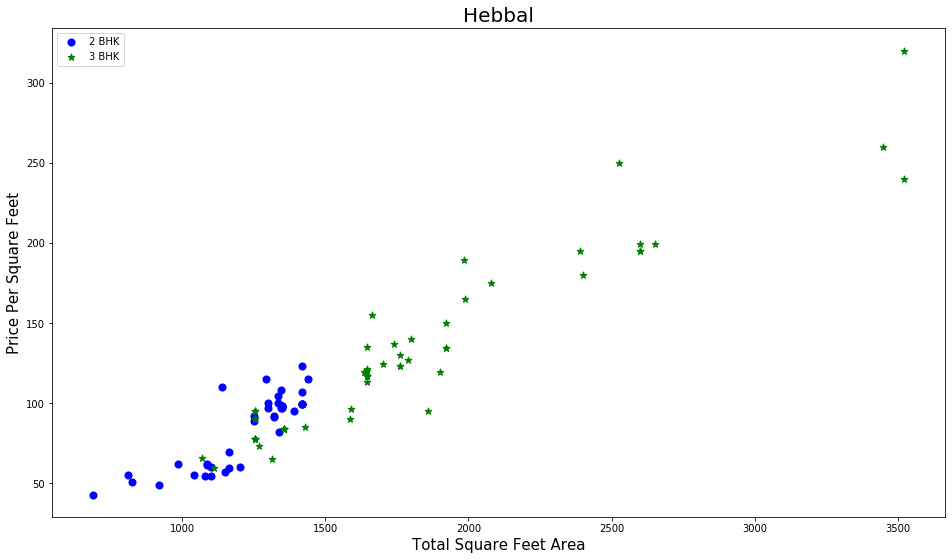

In [42]:
def plot_scatter_plot(df,location):
    bhk2 = df[(df.location == location) & (df.bhk == 2)]
    bhk3 = df[(df.location == location) & (df.bhk == 3)]
    plt.figure(figsize = (16,9))
    plt.scatter(bhk2.total_sqft,bhk2.price,color = 'blue',label = '2 BHK', s = 50)
    plt.scatter(bhk3.total_sqft,bhk3.price,color = 'green',label = '3 BHK', s = 50,marker='*')
    plt.xlabel("Total Square Feet Area",fontsize = 15)
    plt.ylabel("Price Per Square Feet",fontsize = 15)
    plt.title(location, fontsize = 20)
    plt.legend()

plot_scatter_plot(data_7,"Hebbal")

 We should remove properties where for same location the price of 3 bhk bedrooms 
 appartment is less then 2 bedroom appartment(with same square feet area). what we will do for same location ,
 we will build a dictionary stats for that

{
    '1':{
        'mean': 4000
        'std': 2000
        'count': 34
    },
    
    '2': {
        
        'mean': 4000
        'std': 2000
        'count': 34
    },
}

Now we can remove those 2bhk appartments whose price_per_sqft is less than mean price_price_per_sqft of 1 bhk appartment

In [44]:
def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('location'):
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('bhk'):
            bhk_stats[bhk] = {
                'mean': np.mean(bhk_df.price_per_sqft),
                'std': np.std(bhk_df.price_per_sqft),
                'count': bhk_df.shape[0]

            }
        for bhk,bhk_df in location_df.groupby('bhk'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices,bhk_df[bhk_df.price_per_sqft <(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis = 'index')

data_8 = remove_bhk_outliers(data_7)
data_8.shape

(7025, 7)

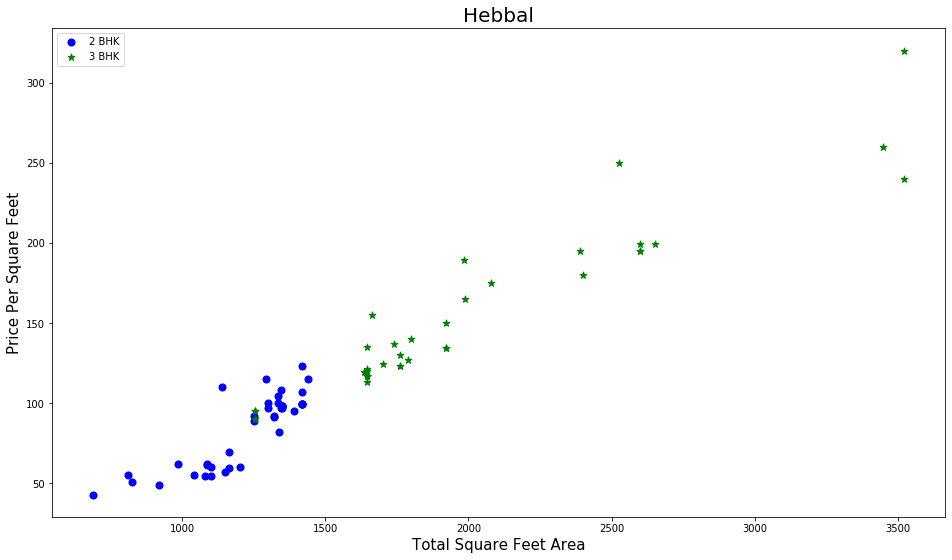

In [45]:
plot_scatter_plot(data_8,"Hebbal")

Text(0, 0.5, 'Count')

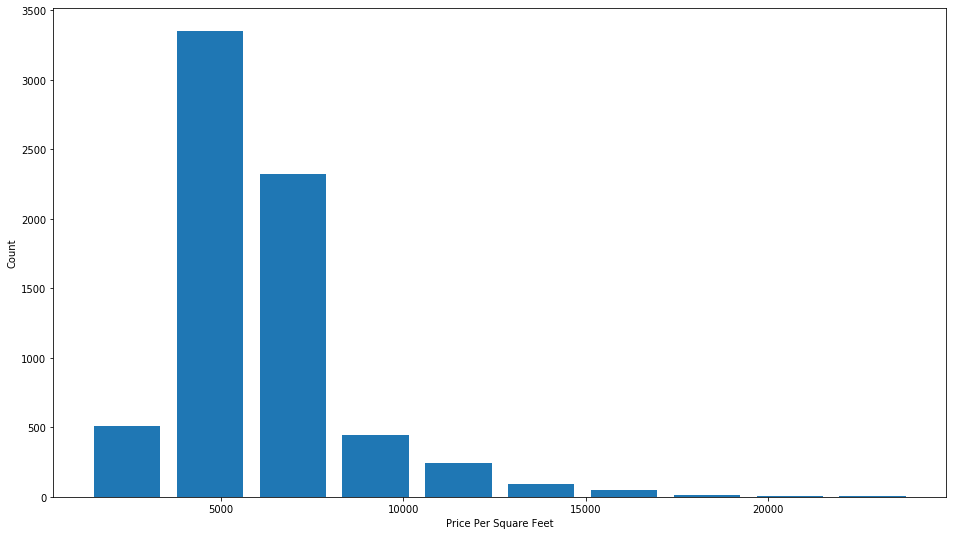

In [46]:
plt.figure(figsize=(16,9))
plt.hist(data_8.price_per_sqft,rwidth=0.8)
plt.xlabel("Price Per Square Feet")
plt.ylabel("Count")

In [47]:
data_8.bath.unique()

array([ 4.,  3.,  2.,  8.,  1.,  5.,  6.,  7.,  9., 13.])

In [48]:
data_8[data_8.bath > 10]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
9269,other,13 BHK,5425.0,13.0,275.0,13,5069.124424


Text(0, 0.5, 'Count')

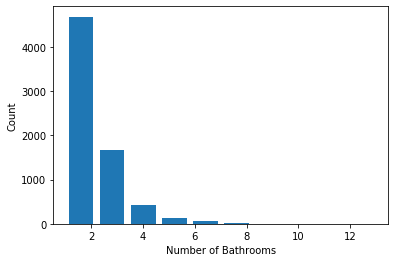

In [50]:
plt.hist(data_8.bath,rwidth = 0.8)
plt.xlabel("Number of Bathrooms")
plt.ylabel("Count")

In [51]:
data_8[data_8.bath>data_8.bhk+2]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
1542,Chikkabanavar,4 Bedroom,2460.0,7.0,80.0,4,3252.032520
6450,Thanisandra,3 BHK,1806.0,6.0,116.0,3,6423.034330
8091,other,6 BHK,11338.0,9.0,1000.0,6,8819.897689


In [56]:
data_9 = data_8[data_8.bath < data_8.bhk+2]
data_9.shape

(6958, 7)

In [57]:
data_9 = data_9.drop(['size','price_per_sqft'], axis = 'columns')
data_9.head()

,location,total_sqft,bath,price,bhk
0,1st Block Jayanagar,2850.0,4.0,428.0,4
1,1st Block Jayanagar,1630.0,3.0,194.0,3
2,1st Block Jayanagar,1875.0,2.0,235.0,3
3,1st Block Jayanagar,1200.0,2.0,130.0,3
4,1st Block Jayanagar,1235.0,2.0,148.0,2


In [60]:
dummies = pd.get_dummies(data_9.location)
dummies.head(30)

,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,AECS Layout,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [61]:
data_10 = pd.concat([data_9,dummies.drop('other',axis = 'columns')],axis = 'columns')
data_10.head()

,location,total_sqft,bath,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1st Block Jayanagar,2850.0,4.0,428.0,4,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1st Block Jayanagar,1630.0,3.0,194.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1st Block Jayanagar,1875.0,2.0,235.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1st Block Jayanagar,1200.0,2.0,130.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1st Block Jayanagar,1235.0,2.0,148.0,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [62]:
data_11 = data_10.drop('location',axis = 1)

In [63]:
data_11.head()

,total_sqft,bath,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Phase JP Nagar,6th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,428.0,4,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,194.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1875.0,2.0,235.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1200.0,2.0,130.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1235.0,2.0,148.0,2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [65]:
data_11.shape

(6958, 241)

In [89]:
x = data_11.drop('price',axis = 'columns')
y = data_11['price']

In [90]:
from sklearn.model_selection import train_test_split

In [91]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 10)

In [92]:
from sklearn.linear_model import LinearRegression

In [93]:
lr_clf = LinearRegression()
lr_clf.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

y_pred = lr_clf.predict(x_test)
y_pred

In [95]:
lr_clf.score(x_test,y_test)

0.8583018637946587

In [96]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

In [97]:
cv = ShuffleSplit(n_splits=5 ,test_size=0.2 ,random_state=0)

In [98]:
 cross_val_score(LinearRegression(), x, y, cv = cv)

array([0.87773099, 0.84343801, 0.78315893, 0.89712601, 0.87193968])

                  **************** THE END ****************
                  ***** CREATED BY :- GITANSHU SAXENA *****